In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
conda install  -c damianavila82 rise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
#load data

df= pd.read_csv('Documents/realtor_data.csv')

In [5]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [6]:
df.isnull().sum()

status               0
price               71
bed             115982
bath            111752
acre_lot        160781
full_address         0
street            1090
city                72
state                0
zip_code           202
house_size      212387
sold_date       385922
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.duplicated(subset="full_address")

829       False
3380       True
5083       True
5387       True
9053       True
          ...  
733136     True
733145     True
733146     True
733147     True
733157     True
Length: 207571, dtype: bool

In [9]:
df.drop_duplicates(subset=['full_address'], inplace = True)
df.index = np.arange(df.index.size)

In [10]:
df['bed'].astype(int)

0        7
1        5
2        4
3        3
4        3
        ..
30937    5
30938    2
30939    4
30940    3
30941    1
Name: bed, Length: 30942, dtype: int32

In [11]:
year = list()
for i in df["sold_date"]:
    year.append(int(str(i)[:4]))
df["year"] = year

In [12]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
0,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
1,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
2,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
3,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
4,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012


In [13]:
df.loc[df['state'] == 'Colorado']

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year


In [14]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New York', 'Rhode Island', 'Maine',
       'New Jersey', 'Pennsylvania', 'Delaware'], dtype=object)

## Real Estate Investment Plan
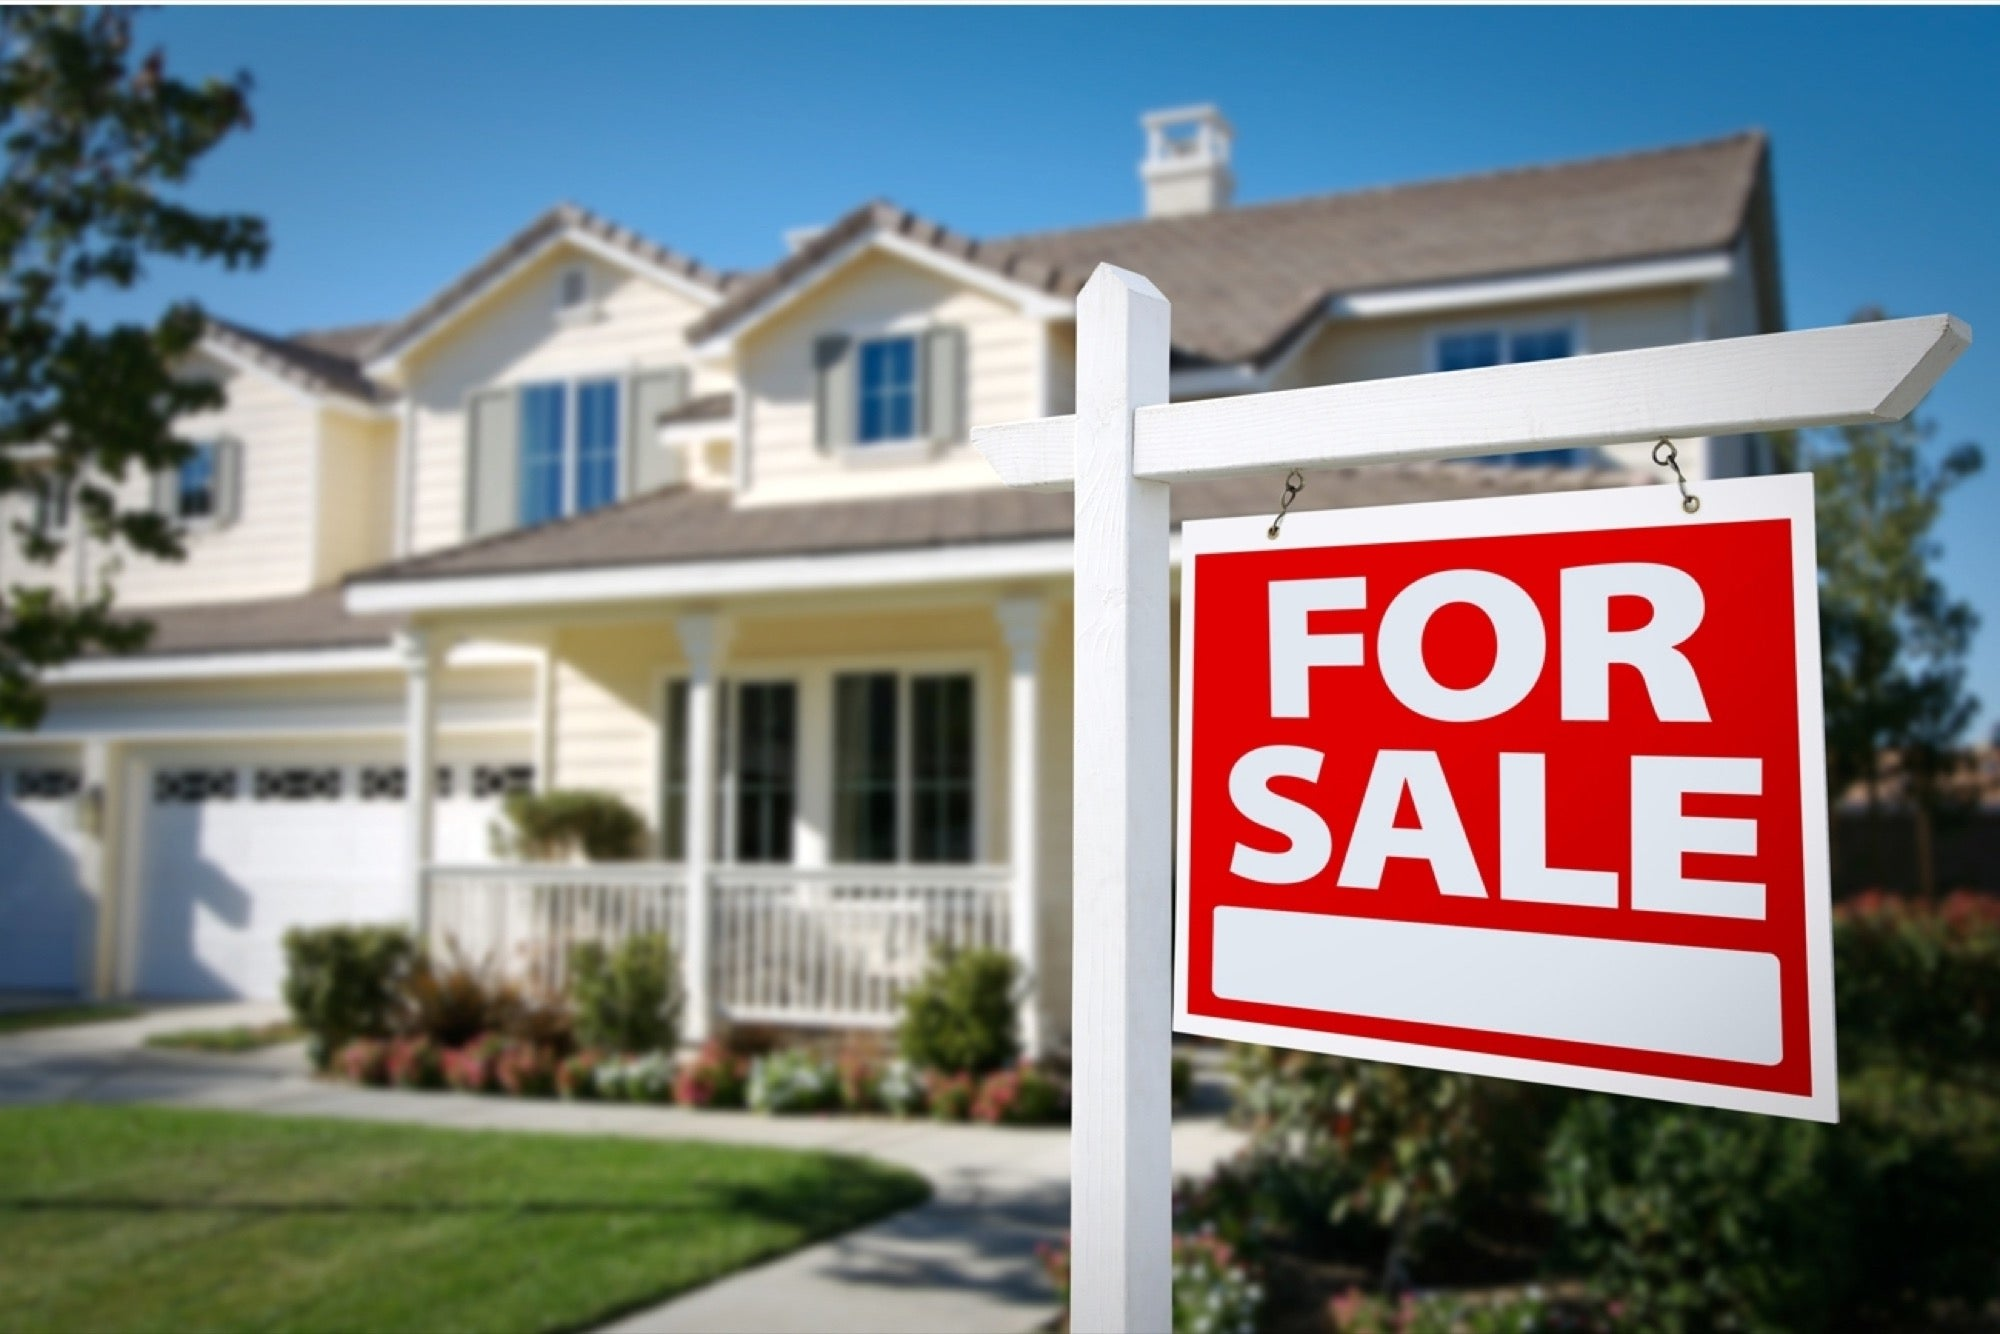

   ##                 What Should We Do For An Investment Property?

                            1. Which state should we buy an investment property in?
                            2. How many bedrooms and bathrooms should the house have?
                            3. What is the median & mean price of houses?
                            4. What traits do the houses have in common?

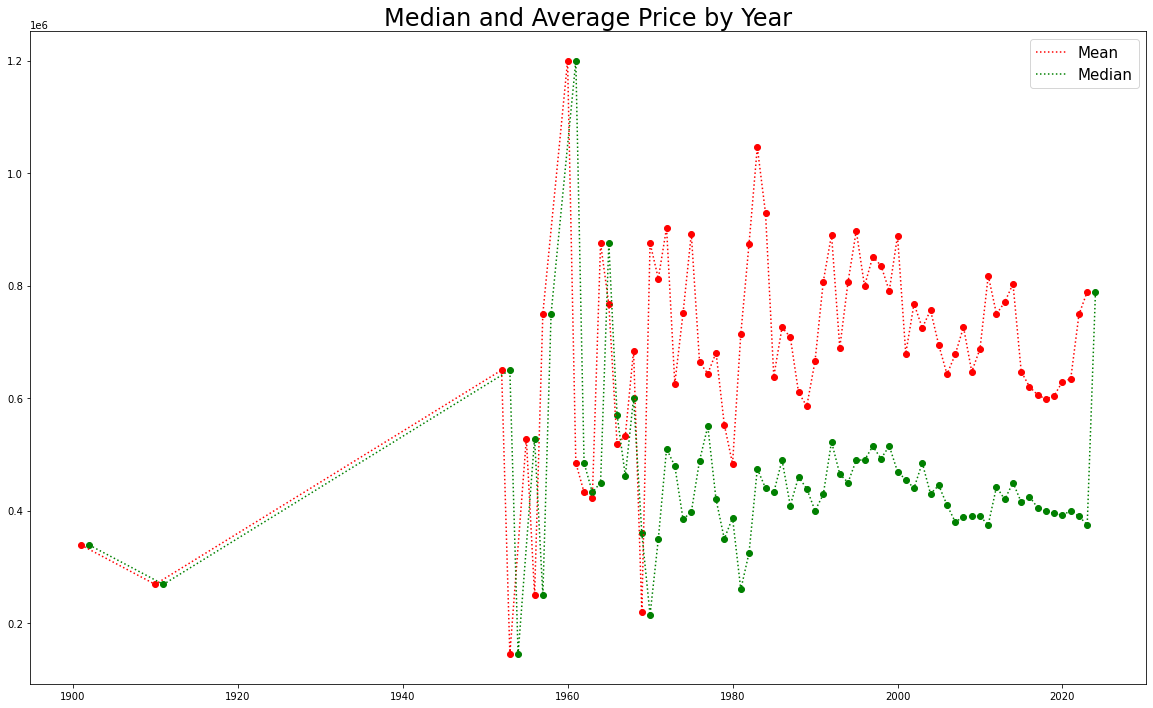

In [22]:
plt.figure(figsize = (20, 12))
plt.title("Median and Average Price by Year", fontsize = 24)

medprice = df.groupby("year")["price"].median()
avgprice = df.groupby("year")["price"].mean()
medprice.index.sort_values(ascending = False)

plt.scatter(avgprice.index, avgprice, color = "red")
plt.scatter(medprice.index+1, medprice, color = "green")
plt.plot(avgprice.index, avgprice, linestyle = ":", color = "red")
plt.plot(medprice.index+1, medprice, linestyle = ":", color = "green",)
plt.legend(["Mean", "Median"], fontsize = 15)

   ## Median and Average Price

  ### - Median price is lower than the mean
  ### - It is possible the price of our property will be less than the mean
  ### - Mean prices have gone up in the last six years
  ### - Median prices have gone down

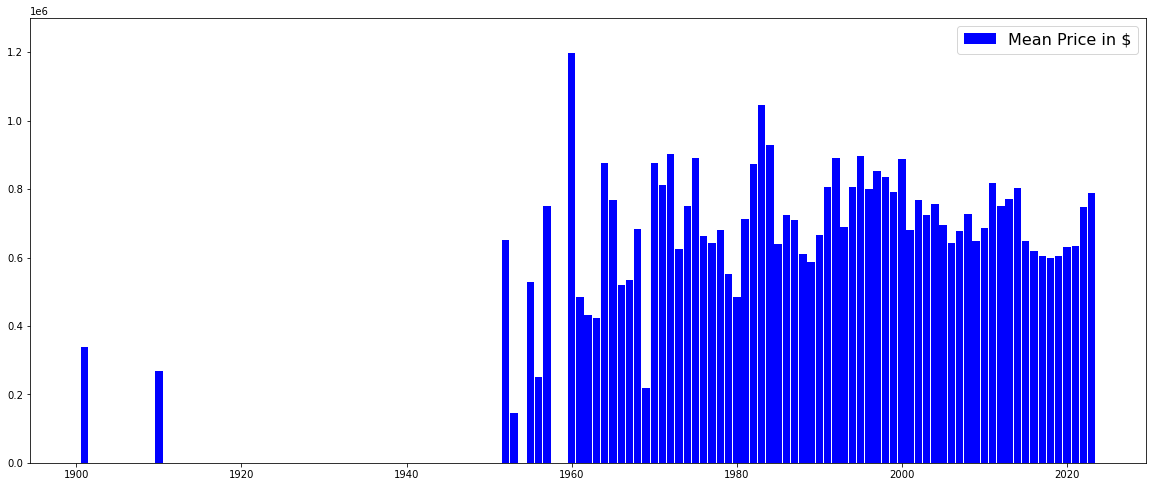

In [16]:
plt.figure(figsize = (20, 18))
plt.title("Average Price by Year", fontsize = 20)

avgprice = df.groupby("year")["price"].mean()

plt.subplot(2,1,1)
plt.bar(avgprice.index, avgprice, width = 0.9, color = "blue")
plt.setp(plt.gca(),ylim=(0,1300000))
plt.legend(["Mean Price in $"], fontsize = 16)

## Mean Prices
### - Average reported sales have been steady
### - Missing data in the early 1900s
### - Rising mean prices after taking a dip

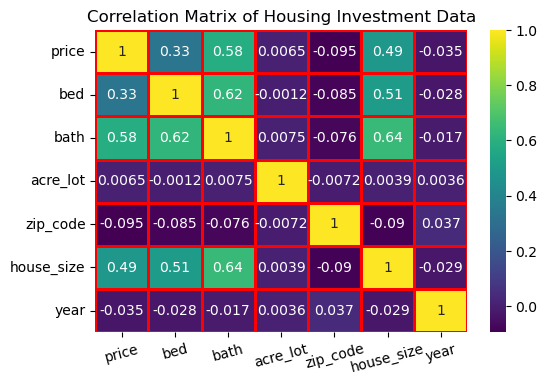

In [21]:
plt.figure(dpi=100)
plt.title('Correlation Matrix of Housing Investment Data')
sns.heatmap(df.corr(), annot=True,lw=1,linecolor='red', cmap='viridis')
plt.xticks(rotation=15)
plt.yticks(rotation=0)
plt.show()

## Common Traits

### - Bed & bath go together
### - These relationships help with what kind of house we should by
### - Bath & size of the house go together
### - Most of the elements are slightly correlated

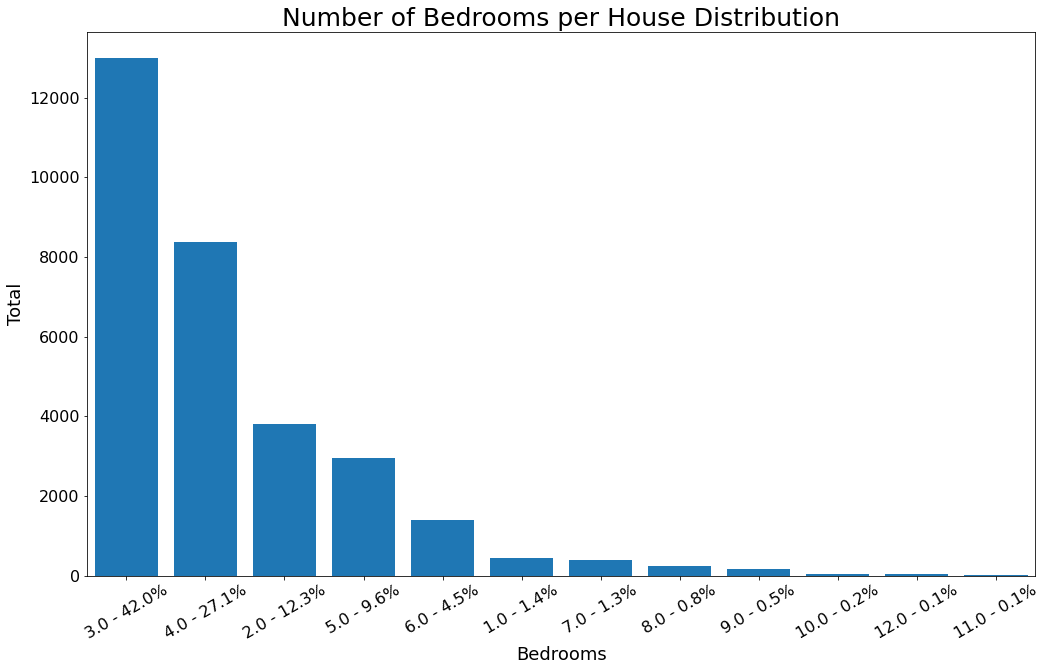

In [18]:
plt.figure(figsize=(17, 10))
plt.title("Number of Bedrooms per House Distribution", fontsize =25)

bed = df.value_counts("bed")
labels = list()
for i, j in enumerate(bed):
    labels.append("{} - {:.1f}%".format(bed.index[i], 100*j/bed.sum()))
    
plt.bar(labels, bed)
plt.xlabel("Bedrooms", fontsize=18)
plt.xticks(fontsize=16, rotation = 30)
plt.ylabel("Total", fontsize=18)
plt.yticks(fontsize=16)

plt.axis([-.5,11.5, None, None])
plt.show()

## Bedroom Data

### - We should purchase a three or four bedroom house
### - Most popular type of house
### - These would be the most profitable types of properties

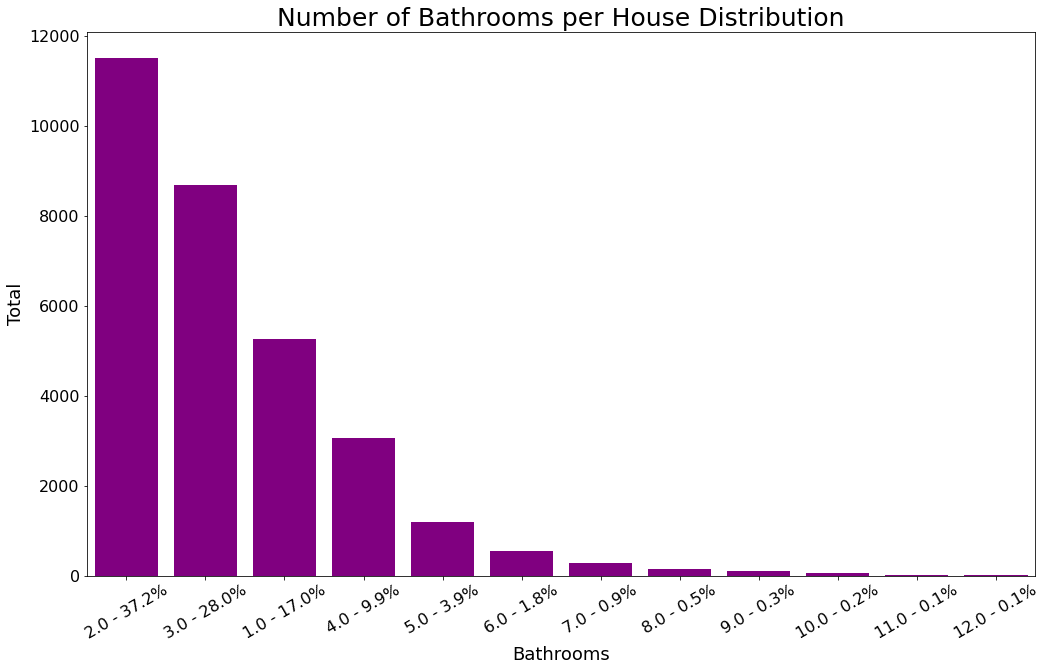

In [19]:
plt.figure(figsize=(17, 10))
plt.title("Number of Bathrooms per House Distribution", fontsize =25)

bath = df.value_counts("bath")
labels = list()
for i, j in enumerate(bath):
    labels.append("{} - {:.1f}%".format(bath.index[i], 100*j/bath.sum()))
    

plt.bar(labels, bath, color = "purple")
plt.xlabel("Bathrooms", fontsize=18)
plt.xticks(fontsize=16, rotation = 30)
plt.ylabel("Total", fontsize=18)
plt.yticks(fontsize=16)

plt.axis([-.5,11.5, None, None])

plt.show()

## Bathrooms

### - We should purchase a house with four to three beds & three to two baths.
### - These are the traits that people want in a house
### - A one bathroom would be ideal but not many of these

Text(0.5, 1.0, 'Real Estate Sales per State')

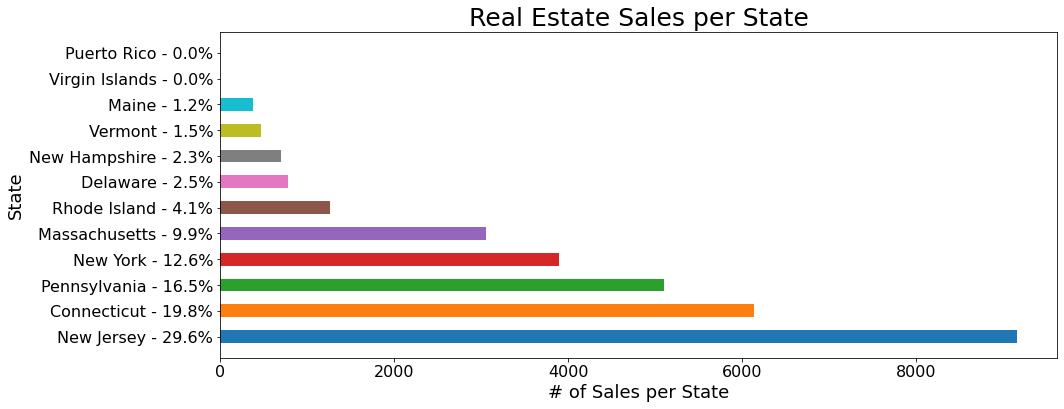

In [20]:
plt.figure(figsize = (15, 6))
statenum = df.value_counts("state")

for i, j in enumerate(statenum):
    label = "{} - {:.1f}%".format(statenum.index[i], 100*j/statenum.sum())
    plt.barh(label, j,height = 0.5)
    
plt.xlabel("# of Sales per State", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("State", fontsize=18)
plt.yticks(fontsize=16)   
plt.title("Real Estate Sales per State", fontsize = 25)

## Different States

### - Best to choose a state in the middle
### - I recomend Massachusetts
### - Universities, smaller area, and beach potential
### - Lots of potential competition in New Jersey


##                                                 Summary

###                                               I suggest we purchase:  
  
###                                                    1. Four Bedrooms
###                                                    2. Two Bathrooms
###                                                    3. In Massachusettes
###                                                    4. Less than the mean price
###                                                    5. Is it possible to find this?